In [1]:
# Please enter your NAME and student ID
NAME = "Maddela Uday Kiran Goud"
ID = "1122397"


In [2]:
# Please run this cell to get Java and spark installed
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install pyspark==2.4.7


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graphics-driver

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"


In [4]:
# Mount the cloud folder for data file storage
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:

csvFile = "/content/gdrive/MyDrive/covid19/covid-19.csv"





In [6]:
#Exploratory Data Analysis
# Implemented by " Uday Kiran " ,Rollno 1122397
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from sklearn.preprocessing import MinMaxScaler
sns.set(color_codes=True)
data = pd.read_csv("/content/gdrive/MyDrive/covid-19 symptoms dataset.csv")
print(data)

      fever  bodyPain  age  runnyNose  diffBreath  infectionProb
0       102         0    9          0          -1              0
1       102         0   10          0           0              1
2       104         0   33          1          -1              0
3       101         1   59          0           1              0
4        99         0   98          0           0              0
...     ...       ...  ...        ...         ...            ...
2570     99         0   90          0           0              1
2571    100         0   53          0          -1              1
2572    101         0   44          1           0              0
2573    102         0   97          0          -1              1
2574    104         1   62          1          -1              1

[2575 rows x 6 columns]


In [7]:
data.shape # display rows and column in dataset 


(2575, 6)

In [20]:
#please run this cell when bellow cell is not runing and giving error and then restart runtime
#if your code is working without runing this cell then please don't run it
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 4.1 MB/s 
     |████████████████████████████████| 3.1 MB 36.5 MB/s 
     |████████████████████████████████| 102 kB 11.7 MB/s 
     |████████████████████████████████| 10.1 MB 35.4 MB/s 
     |████████████████████████████████| 636 kB 39.7 MB/s 
     |████████████████████████████████| 62 kB 803 kB/s 
     |████████████████████████████████| 675 kB 46.0 MB/s 
     |████████████████████████████████| 812 kB 40.6 MB/s 
  Using cached scipy-1.7.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=74909975171eba99891a579f0317d813f89df17c2cdc18092566d33d15f00fb2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=23143b7bf92ac4fd55239e1398744dc27c98184330bf4b3dfa1f0a0a7ff8dd0a
  Stored in directory: /ro

In [8]:
# To display the top 5 rows
data.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


In [9]:
# To display the bottom 5 rows
data.tail(5)

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1
2574,104,1,62,1,-1,1


In [10]:
# Checking the data type
data.dtypes

fever            int64
bodyPain         int64
age              int64
runnyNose        int64
diffBreath       int64
infectionProb    int64
dtype: object

In [11]:
data.count()

fever            2575
bodyPain         2575
age              2575
runnyNose        2575
diffBreath       2575
infectionProb    2575
dtype: int64

In [12]:
# Finding the null values.
print(data.isnull().sum())

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64


In [13]:
# data cleaning (missing values or duplicated records
data = data.dropna() 
data.count()

fever            2575
bodyPain         2575
age              2575
runnyNose        2575
diffBreath       2575
infectionProb    2575
dtype: int64

In [14]:
# Finding duplicate data
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)


number of duplicate rows:  (228, 6)


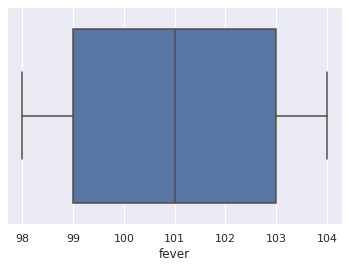

In [15]:
# Box Plotting 
sns.boxplot(x=data['fever'])

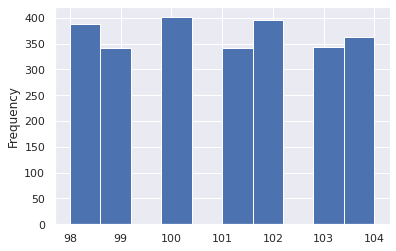

In [16]:
#Histogram Plot
data['fever'].plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


(array([ 97.,  98.,  99., 100., 101., 102., 103., 104., 105.]),
 <a list of 9 Text major ticklabel objects>)

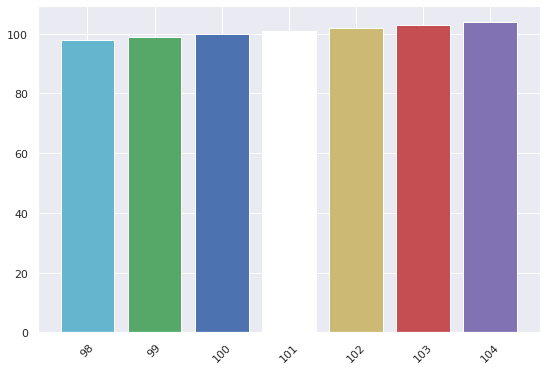

In [17]:
#Bar plot
plt.figure(figsize=(9,6))
 
plt.bar(x=data['fever'],
 
        height=data['fever'], color='rgbwymc')
 
plt.xticks(rotation=45)

In [ ]:
#Task I.2: Recommendation engine
#In this task work implementations are as following as 
#Algorithm:     Alternative Least Squares Algorithm
#Model training and predictions 
#Model evaluation using MSE 

In [18]:
data['age_id'] = data['age'].astype("category").cat.codes
data['age_id']
data['bodyPain_id'] = data['bodyPain'].astype("category").cat.codes
data['bodyPain_id']

0       0
1       0
2       0
3       1
4       0
       ..
2570    0
2571    0
2572    0
2573    0
2574    1
Name: bodyPain_id, Length: 2575, dtype: int8

In [19]:
fdata = data.loc[data.infectionProb != 0]
fdata

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,age_id,bodyPain_id
1,102,0,10,0,0,1,9,0
5,102,0,59,1,1,1,58,0
7,99,1,34,0,1,1,33,1
8,104,0,45,1,-1,1,44,0
9,104,1,56,0,1,1,55,1
...,...,...,...,...,...,...,...,...
2562,98,0,94,1,-1,1,93,0
2570,99,0,90,0,0,1,89,0
2571,100,0,53,0,-1,1,52,0
2573,102,0,97,0,-1,1,96,0


In [20]:
n_users = data['age_id'].unique().shape[0]
n_items = data['bodyPain_id'].unique().shape[0]
ratings = np.zeros((n_users, n_items))
matrix_size = np.prod(ratings.shape)
interaction = np.flatnonzero(ratings).shape[0]
sparsity = 100 * (interaction / matrix_size)
print('dimension: ', ratings.shape)
print('sparsity: {:.1f}%'.format(sparsity))

dimension:  (100, 2)
sparsity: 0.0%


In [21]:
similar = data['age_id'] = data['age'].astype("category").cat.codes
print (similar)

0        8
1        9
2       32
3       58
4       97
        ..
2570    89
2571    52
2572    43
2573    96
2574    61
Length: 2575, dtype: int8


In [26]:
#!pip install implicit
#import implicit 
sparse_item_user = sparse.csr_matrix((data['fever'].astype(float), (data['age'], data['bodyPain'])))

In [22]:
sparse_user_item = sparse.csr_matrix((data['fever'].astype(float), (data['bodyPain'], data['age'])))

In [24]:
!pip install pandas --upgrade
!pip install implicit --upgrade

In [27]:
#Building the ALS model
import implicit 
#model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.5, iterations=50)
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.5, iterations=50)
alpha_val = 80
data_conf = (sparse_item_user * alpha_val).astype('double')
model.fit(data_conf)

  0%|          | 0/50 [00:00<?, ?it/s]

In [28]:
##Get Recommendations
user_id =  1
recommended = model.recommend(user_id, sparse_user_item)
print(recommended)

[(0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0)]


In [29]:
# Find similar items
item_id = 12
n_similar = 5
similar = model.similar_items(item_id, n_similar)
print(similar)

[(0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0)]


In [30]:
#Model training and predictions 

from numpy.linalg import solve

class ExplicitMF():
    def __init__(self, 
                 ratings, 
                 n_factors=40, 
                 item_reg=0.0, 
                 user_reg=0.0,
                 verbose=False):
        """
        Train a matrix factorization model to predict empty 
        entries in a matrix. The terminology assumes a 
        ratings matrix which is ~ user x item
        
        Params
        ======
        ratings : (ndarray)
            User x Item matrix with corresponding ratings
        
        n_factors : (int)
            Number of latent factors to use in matrix 
            factorization model
        
        item_reg : (float)
            Regularization term for item latent factors
        
        user_reg : (float)
            Regularization term for user latent factors
        
        verbose : (bool)
            Whether or not to printout training progress
        """
        
        self.ratings = ratings
        self.n_users, self.n_items = ratings.shape
        self.n_factors = n_factors
        self.item_reg = item_reg
        self.user_reg = user_reg
        self._v = verbose

    def als_step(self,
                 latent_vectors,
                 fixed_vecs,
                 ratings,
                 _lambda,
                 type='user'):
        """
        One of the two ALS steps. Solve for the latent vectors
        specified by type.
        """
        if type == 'user':
            # Precompute
            YTY = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(YTY.shape[0]) * _lambda

            for u in xrange(latent_vectors.shape[0]):
                latent_vectors[u, :] = solve((YTY + lambdaI), 
                                             ratings[u, :].dot(fixed_vecs))
        elif type == 'item':
            # Precompute
            XTX = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(XTX.shape[0]) * _lambda
            
            for i in xrange(latent_vectors.shape[0]):
                latent_vectors[i, :] = solve((XTX + lambdaI), 
                                             ratings[:, i].T.dot(fixed_vecs))
        return latent_vectors

    def train(self, n_iter=10):
        """ Train model for n_iter iterations from scratch."""
        # initialize latent vectors
        self.user_vecs = np.random.random((self.n_users, self.n_factors))
        self.item_vecs = np.random.random((self.n_items, self.n_factors))
        
        self.partial_train(n_iter)
    
    def partial_train(self, n_iter):
        """ 
        Train model for n_iter iterations. Can be 
        called multiple times for further training.
        """
        ctr = 1
        while ctr <= n_iter:
            if ctr % 10 == 0 and self._v:
                print ('\tcurrent iteration: {}'.format(ctr))
            self.user_vecs = self.als_step(self.user_vecs, 
                                           self.item_vecs, 
                                           self.ratings, 
                                           self.user_reg, 
                                           type='user')
            self.item_vecs = self.als_step(self.item_vecs, 
                                           self.user_vecs, 
                                           self.ratings, 
                                           self.item_reg, 
                                           type='item')
            ctr += 1
    
    def predict_all(self):
        """ Predict ratings for every user and item. """
        predictions = np.zeros((self.user_vecs.shape[0], 
                                self.item_vecs.shape[0]))
        for u in xrange(self.user_vecs.shape[0]):
            for i in xrange(self.item_vecs.shape[0]):
                predictions[u, i] = self.predict(u, i)
                
        return predictions
    def predict(self, u, i):
        """ Single user and item prediction. """
        return self.user_vecs[u, :].dot(self.item_vecs[i, :].T)
    
    def calculate_learning_curve(self, iter_array, test):
        
        iter_array.sort()
        self.train_mse =[]
        self.test_mse = []
        iter_diff = 0
        for (i, n_iter) in enumerate(iter_array):
            if self._v:
                print ('Iteration: {}'.format(n_iter))
            if i == 0:
                self.train(n_iter - iter_diff)
            else:
                self.partial_train(n_iter - iter_diff)

            predictions = self.predict_all()

            self.train_mse += [get_mse(predictions, self.ratings)]
            self.test_mse += [get_mse(predictions, test)]
            if self._v:
                print ('Train mse: ' + str(self.train_mse[-1]))
                print( 'Test mse: ' + str(self.test_mse[-1]))
            iter_diff = n_iter

In [31]:
#calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [32]:
#Optimizing ALS model parameters & Model evaluation using MSE 
latent_factors = [5, 10, 20, 40, 80]
regularizations = [0.1, 1., 10., 100.]
regularizations.sort()
iter_array = [1, 2, 5, 10, 25, 50, 100]

best_params = {}
best_params['n_factors'] = latent_factors[0]
best_params['reg'] = regularizations[0]
best_params['n_iter'] = 0
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None

for fact in latent_factors:
    print ('Factors: {}'.format(fact))
    for reg in regularizations:
        print ('Regularization: {}'.format(reg))

Factors: 5
Regularization: 0.1
Regularization: 1.0
Regularization: 10.0
Regularization: 100.0
Factors: 10
Regularization: 0.1
Regularization: 1.0
Regularization: 10.0
Regularization: 100.0
Factors: 20
Regularization: 0.1
Regularization: 1.0
Regularization: 10.0
Regularization: 100.0
Factors: 40
Regularization: 0.1
Regularization: 1.0
Regularization: 10.0
Regularization: 100.0
Factors: 80
Regularization: 0.1
Regularization: 1.0
Regularization: 10.0
Regularization: 100.0


In [33]:
#Task I.3: Classification
'''This subtask requires you to implement a classification system with Logistic regression. You need to include
• Logistic Regression model training
• Model evaluation'''

'This subtask requires you to implement a classification system with Logistic regression. You need to include\n• Logistic Regression model training\n• Model evaluation'

In [34]:
#Classification
# Implemented by " Uday Kiran " ,Rollno 1122397
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
sns.set(color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# input
x = data.iloc[:, [2, 3]].values
x

array([[ 9,  0],
       [10,  0],
       [33,  1],
       ...,
       [44,  1],
       [97,  0],
       [62,  1]])

In [36]:
y = data.iloc[:, 4].values
y

array([-1,  0, -1, ...,  0, -1, -1])

In [37]:
data['age'].unique()

array([  9,  10,  33,  59,  98,  88,  34,  45,  56,  96,  77,  35,  25,
        64,  84,  43,  40,  81,  19,  30,  44,  23,  11,  15,  70,  26,
        97,  17,  16,  18,   3,  79,  39,  75,  74,   4,  49,  89,  31,
       100,  80,  73,  95,  29,   6,  12,  82,  38,  21,  53,   5,  61,
        91,  92,  63,  57,  47,  32,  68,  85,  94,  78,  87,  67,   1,
        55,  58,  72,  52,  28,  13,  65,  51,  86,  66,  41,  54,  42,
        36,   2,  14,  27,  22,  76,  50,  69,  62,  93,  71,  24,   8,
         7,  46,  37,  20,  60,  90,  99,  83,  48])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#Model evaluation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )
  
# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
  
  
# Driver code
  
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "/content/gdrive/MyDrive/covid-19 symptoms dataset.csv" )
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,-1:].values
      
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
      
    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
      
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
  
  
if __name__ == "__main__" :     
    main()


Accuracy on test set by our model       :   48.07916181606519
Accuracy on test set by sklearn model   :   50.87310826542492


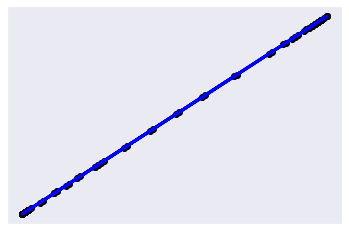

In [41]:
# Plot outputs
# Split the data into training/testing sets
data_X_train = data[:-20]
data_X_test = data[-20:]

# Split the targets into training/testing sets
data_y_train = data[:-20]
data_y_test = data[-20:]
import matplotlib.pyplot as plt 
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_train, data_y_train, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()